##  Import libraries ##

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from sklearn.cluster import KMeans

## Open the file

In [3]:
file_path = 'Trips_2018.csv'

if not os.path.exists('project'):
    os.makedirs('project')

with open(file_path, 'r') as f:
    df = pd.read_csv(f)

In [4]:
# %pwd
# import os

# # Change to a specific directory
# os.chdir('C:/Users/ELLI/Desktop/Third semester/Intro to Buisiness analytics')


## Get the keys

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


In [6]:
df

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548334,17548334,734,2018-12-31 23:55:06.9910,2019-01-01 00:07:21.2300,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,27111,Subscriber,1986,1
17548335,17548335,2551,2018-12-31 23:55:44.3070,2019-01-01 00:38:15.7820,3320.0,40.794067,-73.962868,2006.0,40.765909,-73.976342,16390,Customer,1969,0
17548336,17548336,2376,2018-12-31 23:56:52.8500,2019-01-01 00:36:29.2860,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,34398,Subscriber,1979,1
17548337,17548337,2758,2018-12-31 23:58:29.2120,2019-01-01 00:44:27.5170,3320.0,40.794067,-73.962868,281.0,40.764397,-73.973715,30818,Customer,1969,0


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)



Unnamed: 0                    0
tripduration                  0
starttime                     0
stoptime                      0
start_station_id           2497
start_station_latitude        0
start_station_longitude       0
end_station_id             2497
end_station_latitude          0
end_station_longitude         0
bikeid                        0
usertype                      0
birth_year                    0
gender                        0
dtype: int64


In [8]:
columns_to_drop=['start_station_id', 'end_station_id', 'Unnamed: 0'] #we drop these columns as we have information about our spartial clustering from start_station_latitude and end_station longtitude
df=df.drop(columns=columns_to_drop)
df


,tripduration,starttime,stoptime,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,40.767272,-73.993929,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,40.767272,-73.993929,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,40.767272,-73.993929,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,40.767272,-73.993929,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,40.767272,-73.993929,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...
17548334,734,2018-12-31 23:55:06.9910,2019-01-01 00:07:21.2300,40.730477,-73.999061,40.749156,-73.991600,27111,Subscriber,1986,1
17548335,2551,2018-12-31 23:55:44.3070,2019-01-01 00:38:15.7820,40.794067,-73.962868,40.765909,-73.976342,16390,Customer,1969,0
17548336,2376,2018-12-31 23:56:52.8500,2019-01-01 00:36:29.2860,40.701907,-74.013942,40.701221,-74.012342,34398,Subscriber,1979,1
17548337,2758,2018-12-31 23:58:29.2120,2019-01-01 00:44:27.5170,40.794067,-73.962868,40.764397,-73.973715,30818,Customer,1969,0


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/home/mike/miniconda3/envs/scientific/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mike/miniconda3/envs/scientific/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mike/miniconda3/envs/scientific/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mike/miniconda3/envs/scientific/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

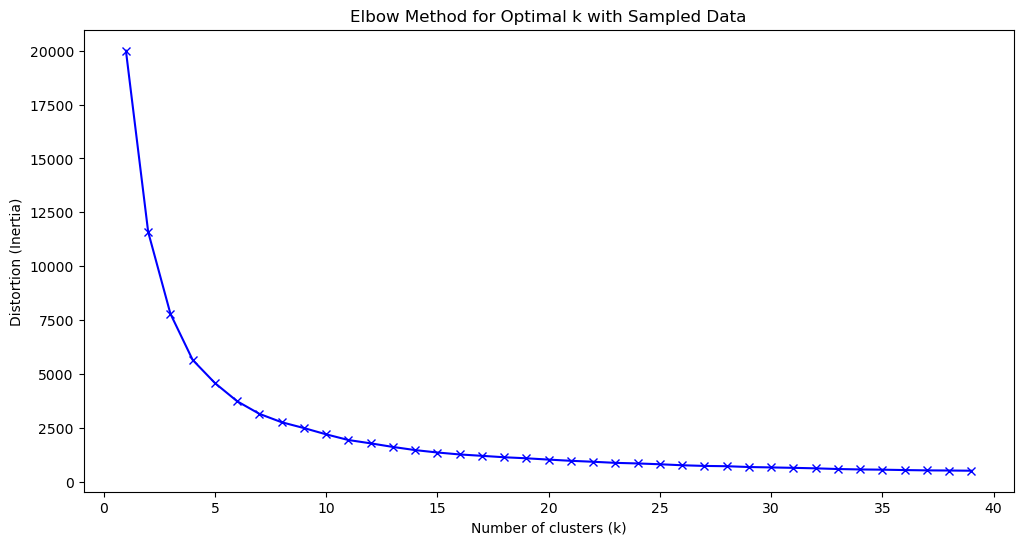

In [10]:
#Finding the optimal number of clusters with elbow method

#this method is time consuming so instead of using the entire dataset to find the optimal number of clusters,I am working with a random sample.

sample_size = 10000 
df_sample = df.sample(n=sample_size, random_state=42)

# Extract coordinates from the sample
coordinates_sample = df_sample[['start_station_latitude', 'start_station_longitude']]

#Standardize the coordinates
scaler = StandardScaler()
coordinates_standardized = scaler.fit_transform(coordinates_sample)

#Elbow method
distortions = []
K = range(1, 40)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coordinates_standardized)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(12, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k with Sampled Data')
plt.show()
# distortions = []
# coordinates = df[['start_station_latitude', 'start_station_longitude']]
# #We standarized our data
# scaler = StandardScaler()
# coordinates_standardized = scaler.fit_transform(coordinates)
# for k in range(1, 40):  
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(coordinates_standardized)
#     distortions.append(kmeans.inertia_)

# plt.plot(range(1, 40), distortions, marker='o')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Distortion')
# plt.title('Elbow Method for Optimal k')
# plt.show()

In [11]:
#Spatial clustering for stations
#now we know for sure that we will use 20 clusters as we can see from the elbow plot that after 5 clusters as we increase the number of clusters we wil not see any better fit in our data

num_clusters = 20
#Kmeans to the sampled data
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(df_sample[['start_station_latitude', 'start_station_longitude']])

df['cluster'] = kmeans.predict(df[['start_station_latitude', 'start_station_longitude']]) #All trips in the full dataset are assigned to the nearest cluster based on their starting latitude and longitude.


/home/mike/miniconda3/envs/scientific/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
!pip install tqdm folium plotly
from tqdm import tqdm

In [13]:
#First before plotting we have to deal with the outliers 
#The latitude of New York City is approximately between 40.4774 and 45.01585, and the longitude is approximately between -79.76259 and -71.18507.

lon_min = -79.76259
lat_min = 40.4774
lon_max = -71.18507
lat_max = 45.01585

# Store the stations that are within the boundaries
stations = df[
    (df['start_station_latitude'] > lat_min) &
    (df['start_station_latitude'] < lat_max) &
    (df['start_station_longitude'] > lon_min) &
    (df['start_station_longitude'] < lon_max)
]

print(stations)

          tripduration                 starttime                  stoptime  \
0                  970  2018-01-01 13:50:57.4340  2018-01-01 14:07:08.1860   
1                  723  2018-01-01 15:33:30.1820  2018-01-01 15:45:33.3410   
2                  496  2018-01-01 15:39:18.3370  2018-01-01 15:47:35.1720   
3                  306  2018-01-01 15:40:13.3720  2018-01-01 15:45:20.1910   
4                  306  2018-01-01 18:14:51.5680  2018-01-01 18:19:57.6420   
...                ...                       ...                       ...   
17548334           734  2018-12-31 23:55:06.9910  2019-01-01 00:07:21.2300   
17548335          2551  2018-12-31 23:55:44.3070  2019-01-01 00:38:15.7820   
17548336          2376  2018-12-31 23:56:52.8500  2019-01-01 00:36:29.2860   
17548337          2758  2018-12-31 23:58:29.2120  2019-01-01 00:44:27.5170   
17548338          2459  2018-12-31 23:59:51.0850  2019-01-01 00:40:50.8800   

          start_station_latitude  start_station_longitude  \
0 

In [14]:
# Plot the stations with an underlying map of New York City
subsampled_stations = stations.sample(n=1000, random_state=42)
fig = px.scatter_mapbox(
    subsampled_stations,
    lat='start_station_latitude',
    lon='start_station_longitude',
    color='cluster',
    mapbox_style='carto-positron',
    zoom=9,
    width=1000,
    height=600
)

fig.update_layout(
    title={
        'text': 'Citi Bike Stations in New York City',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    }
)

fig.show()


In [15]:
!pip install geopandas

In [16]:
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Load NYC shapefile
# nyc_shapefile = gpd.read_file(r'C:\Users\ELLI\Desktop\Third semester\Intro to Buisiness analytics\Community Districts')

# # Plotting the shapefile
# fig, ax = plt.subplots()
# nyc_shapefile.boundary.plot(ax=ax, color='black')

# # Convert station coordinates to a GeoDataFrame
# stations_gdf = gpd.GeoDataFrame(stations, 
#                                 geometry=gpd.points_from_xy(stations.start_station_longitude, 
#                                                             stations.start_station_latitude))

# # Ensure the CRS matches between the two GeoDataFrames
# stations_gdf.set_crs(nyc_shapefile.crs, inplace=True)

# # Plotting the stations on top of the shapefile
# stations_gdf.plot(ax=ax, color='red', markersize=5)

# plt.show()


In [17]:
# # Load a detailed NYC shapefile
# nyc_shapefile = gpd.read_file(r'C:\Users\ELLI\Desktop\Third semester\Intro to Buisiness analytics\Community Districts')

# # Ensure both GeoDataFrames are in the same CRS
# stations_gdf = stations_gdf.to_crs(nyc_shapefile.crs)

# # Spatial join, keeping only stations that intersect with the NYC shapefile
# stations_on_land = gpd.sjoin(stations_gdf, nyc_shapefile, op='intersects')


In [18]:
# #Plot it in a map
# import os
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import geopandas as gpd
# from tqdm.notebook import tqdm

# nyc_shapefile = gpd.read_file(r'C:\Users\ELLI\Desktop\Third semester\Intro to Buisiness analytics\Community Districts')

# # Convert your stations data to a GeoDataFrame
# gdf = gpd.GeoDataFrame(
#     stations, geometry=gpd.points_from_xy(stations.start_station_longitude, stations.start_station_latitude))

# # Ensuring both GeoDataFrames have the same CRS (Coordinate Reference System)
# gdf.set_crs(nyc_shapefile.crs, inplace=True)

# # Performing a spatial join to keep only the stations that intersect with the NYC shapefile
# stations_on_land = gpd.sjoin(gdf, nyc_shapefile, op='intersects')

# #stations = df[['start_station_latitude', 'start_station_longitude', 'cluster']].drop_duplicates()
# cluster_color = colors[int(row['cluster']) % len(colors)]

# fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor=cfeature.COLORS['land']))
# ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='none', facecolor=cfeature.COLORS['water']))
# ax.coastlines(resolution='50m', linewidth=1)
# ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='black')

# # Adjusting the extent using stations_on_land
# min_lon = stations_on_land['start_station_longitude'].min()
# max_lon = stations_on_land['start_station_longitude'].max()
# min_lat = stations_on_land['start_station_latitude'].min()
# max_lat = stations_on_land['start_station_latitude'].max()

# ax.set_extent([min_lon, max_lon, min_lat, max_lat])

# # Correcting the loop to use stations_on_land and properly access the colors list
# for index, row in tqdm(stations_on_land.iterrows(), total=stations_on_land.shape[0]):
#     cluster_color = colors[int(row['cluster']) % len(colors)]
#     ax.scatter(row['start_station_longitude'], row['start_station_latitude'], transform=ccrs.PlateCarree(),
#                zorder=10, alpha=0.7, color=cluster_color, edgecolors='black', linewidth=0.5, s=50)
# plt.title('Station Clusters Map')
# plt.show()

In [19]:
#Trasform startime and stoptimeinto datetime data
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])


In [20]:
print(df['starttime'])

0          2018-01-01 13:50:57.434
1          2018-01-01 15:33:30.182
2          2018-01-01 15:39:18.337
3          2018-01-01 15:40:13.372
4          2018-01-01 18:14:51.568
                     ...          
17548334   2018-12-31 23:55:06.991
17548335   2018-12-31 23:55:44.307
17548336   2018-12-31 23:56:52.850
17548337   2018-12-31 23:58:29.212
17548338   2018-12-31 23:59:51.085
Name: starttime, Length: 17548339, dtype: datetime64[ns]


In [21]:
print(df['stoptime'])

0          2018-01-01 14:07:08.186
1          2018-01-01 15:45:33.341
2          2018-01-01 15:47:35.172
3          2018-01-01 15:45:20.191
4          2018-01-01 18:19:57.642
                     ...          
17548334   2019-01-01 00:07:21.230
17548335   2019-01-01 00:38:15.782
17548336   2019-01-01 00:36:29.286
17548337   2019-01-01 00:44:27.517
17548338   2019-01-01 00:40:50.880
Name: stoptime, Length: 17548339, dtype: datetime64[ns]


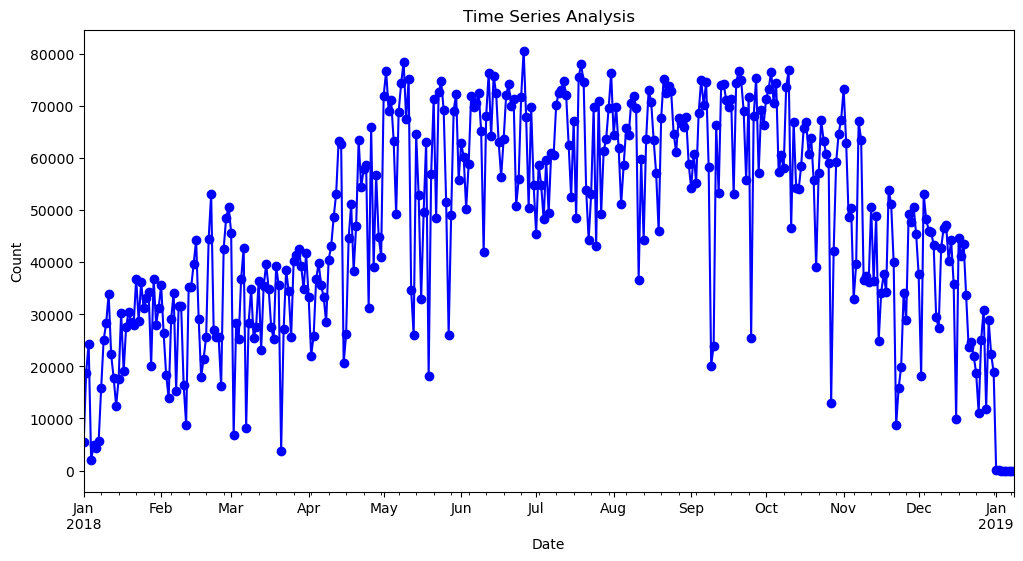

In [22]:
import matplotlib.pyplot as plt

# Set the 'stoptime' column as the index
df.set_index('stoptime', inplace=True)

# Resample the data by day and count the number of events
resampled_data = df.resample('D').size()

# Plot the time series
plt.figure(figsize=(12, 6))
resampled_data.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series Analysis')
plt.show()


In [23]:
# Ensure the dataframe is indexed by 'stoptime'
df.set_index('stoptime', inplace=True)

# Group by cluster, then resample and count events within each group
grouped = df.groupby('cluster').resample('H').size()

# Plotting each cluster's time series
for cluster, group in grouped.groupby(level=0):
    plt.figure(figsize=(12, 6))
    group.plot(marker='o', linestyle='-', title=f'Time Series Analysis for Cluster {cluster}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.show()

KeyError: "None of ['stoptime'] are in the columns"

> What we can see from the plot is:the y axis  represent the number of bike-sharing events or trips recorded within each time period where here we chose D which is daily data which means each data point on the plot represents the total count of bike-sharing events that happened within a single day.

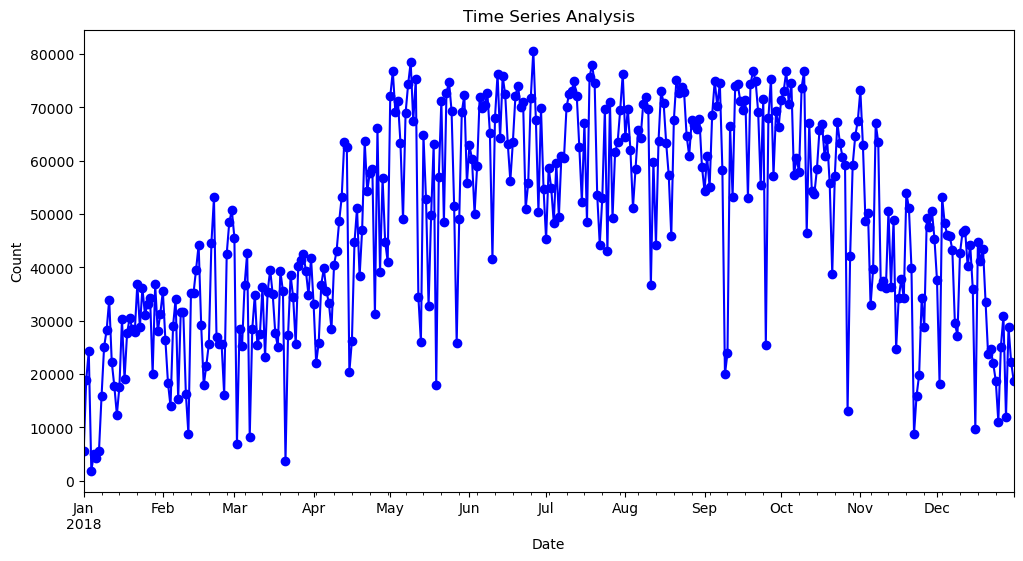

In [ ]:
df.set_index('starttime', inplace=True)

# Resample the data by day and count the number of events
resampled_data = df.resample('D').size()

# Plot the time series
plt.figure(figsize=(12, 6))
resampled_data.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series Analysis')
plt.show()


In [ ]:
# Ensure the dataframe is indexed by 'stoptime'
df.set_index('starttime', inplace=True)

# Group by cluster, then resample and count events within each group
grouped = df.groupby('cluster').resample('H').size()

# Plotting each cluster's time series
for cluster, group in grouped.groupby(level=0):
    plt.figure(figsize=(12, 6))
    group.plot(marker='o', linestyle='-', title=f'Time Series Analysis for Cluster {cluster}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.show()

In [ ]:
hourly_data = df.groupby('cluster').resample('H').size()

# Splitting the data into training and test sets
train_data = hourly_data.loc[:, :'2018-10-31']
test_data = hourly_data.loc[:, '2018-11-01':]


In [ ]:
df

,Unnamed: 0,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
starttime,,,,,,,,,,,,
2018-01-01 13:50:57.434,0,970,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
2018-01-01 15:33:30.182,1,723,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2018-01-01 15:39:18.337,2,496,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
2018-01-01 15:40:13.372,3,306,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
2018-01-01 18:14:51.568,4,306,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:55:06.991,17548334,734,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,27111,Subscriber,1986,1
2018-12-31 23:55:44.307,17548335,2551,3320.0,40.794067,-73.962868,2006.0,40.765909,-73.976342,16390,Customer,1969,0
2018-12-31 23:56:52.850,17548336,2376,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,34398,Subscriber,1979,1


In [ ]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])
df['start_hour'] = df['starttime'].dt.hour
df['start_day_of_week'] = df['starttime'].dt.dayofweek


KeyError: 'starttime'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert starttime and stoptime to datetime objects
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Extract hour and day of the week from starttime
df['start_hour'] = df['starttime'].dt.hour
df['start_day_of_week'] = df['starttime'].dt.dayofweek  # Monday=0, Sunday=6

# Plot the number of trips per hour
plt.figure(figsize=(12, 6))

# Plot start times
plt.subplot(1, 2, 1)
df.groupby('start_hour').size().plot(kind='bar', color='skyblue')
plt.title('Trips by Start Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')

# Plot stop times
plt.subplot(1, 2, 2)
df.groupby('stoptime').size().resample('H').sum().plot(kind='line', color='orange')
plt.title('Trips Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Trips')

plt.tight_layout()
plt.show()


KeyError: 'starttime'

## See how many the missing values are (they are 0.01% of the dataset, we can drop them)

In [ ]:
# Missing values
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with the missing IDs
df = df[pd.to_numeric(df['start_station_id'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['end_station_id'], errors='coerce').notnull()]

In [ ]:
# Create a dictionary with the column names as 'keys' and the column data as 'values'
data = {}
for col in df.columns:
    data[col] = df[col].values

print(data.keys())

dict_keys(['tripduration', 'starttime', 'stoptime', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype', 'birth_year', 'gender', 'cluster'])


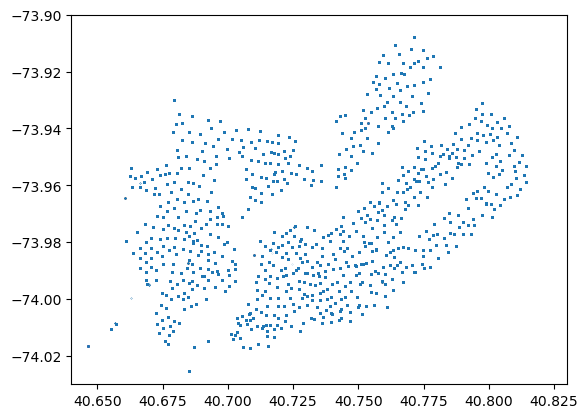

In [ ]:
plt.scatter(data['start_station_latitude'], data['start_station_longitude'], s=0.01)
plt.xlim(40.64,40.83)
plt.ylim(-74.03,-73.9)
plt.show()

In [ ]:
# Scatter plot with color-coded user types
plt.scatter(data['start_station_latitude'], data['start_station_longitude'], c=data['usertype'].map({'Subscriber': 'blue', 'Customer': 'red'}), s=0.01, alpha=0.5)

# Set plot limits
plt.xlim(40.64, 40.83)
plt.ylim(-74.03, -73.9)

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geographical Distribution of Start Stations')

# Add a color legend
legend_labels = {'Subscriber': 'Blue (Subscriber)', 'Customer': 'Red (Customer)'}
for user_type, color in legend_labels.items():
    plt.scatter([], [], color=color, label=user_type)

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='User Type')

# Show the plot
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'map'

## Clustering Calculations

In [ ]:
from sklearn.cluster import KMeans
# Get the latitude and longitude data
X = df[['start_station_latitude', 'start_station_longitude']].values

# Cluster the data into 20 clusters
kmeans = KMeans(n_clusters=20, init='k-means++', random_state=1).fit(X)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_


## Plot the clusters

In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assign a color to each cluster
n_clusters = 20
colors = ListedColormap(sns.color_palette("tab20", n_clusters))

plt.scatter(data['start_station_longitude'], data['start_station_latitude'], c=kmeans.labels_, cmap=colors, s=0.1)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c=range(n_clusters), cmap=colors, s=50, alpha=0.8)

# # Set the legend with the number of each cluster as a label
# legend = plt.legend(df['cluster'].unique(), title='Cluster', loc='upper right')
# legend.set_title('Cluster')
# legend.set_labels(range(n_clusters))

plt.ylim(40.64,40.83)
plt.ylabel('Latitude')
plt.xlim(-74.03,-73.9)
plt.xlabel('Longitude')
plt.title('Citi Bike Stations grouped by location')
plt.show()


## Find the cluster with the most instances (the cluster with the biggest demand)

In [ ]:
# Group the dataframe by 'cluster' and get the unique values of 'start_station_id' for each group
station_ids_by_cluster = df.groupby('cluster')['start_station_id'].unique()

# Loop through each group and for each station ID, filter the dataframe to get all the instances of that station in the cluster and sum them together
cluster_instances = {}
for cluster, station_ids in station_ids_by_cluster.items():
    total_instances = 0
    for station_id in station_ids:
        station_instances = df[(df['cluster'] == cluster) & (df['start_station_id'] == station_id)]
        total_instances += len(station_instances)
    cluster_instances[cluster] = total_instances

# Sort the dictionary by values in descending order
sorted_clusters = sorted(cluster_instances.items(), key=lambda x: x[1], reverse=True)

# Print the clusters in descending order by instances
# for cluster, instances in sorted_clusters:
#     print('Cluster', cluster, 'has', instances, 'instances')

print(f'Most important cluster: {sorted_clusters[0][0]}')
print(f'Number of instances: {sorted_clusters[0][1]}')

In [ ]:
# Get the most important cluster ID
most_important_cluster = sorted_clusters[0][0]

# Filter the original DataFrame for the most important cluster
most_important_cluster_data = df[df['cluster'] == most_important_cluster]

# Display the data in the most important cluster
print(f'Data in the most important cluster (Cluster {most_important_cluster}):')
print(most_important_cluster_data.head())  # You can adjust the number of rows displayed as needed
